In [2]:
import numpy as np
import cv2 # computer vision 
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# tk notebook

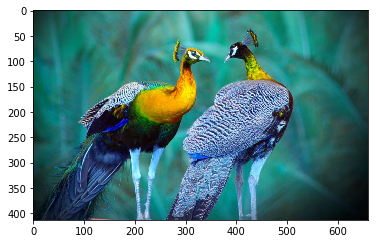

In [4]:
img = cv2.imread('test.jpg')
plt.imshow(img)

In [7]:
# red green blue  -> any image
# blue green red  -> python

r, g , b = cv2.split(img)

In [9]:
r.shape , g.shape, b.shape

((413L, 660L), (413L, 660L), (413L, 660L))

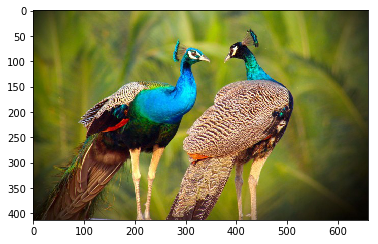

In [10]:
img_new = cv2.merge((b,g,r))
plt.imshow(img_new)

In [11]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [12]:
gray.shape

(413L, 660L)

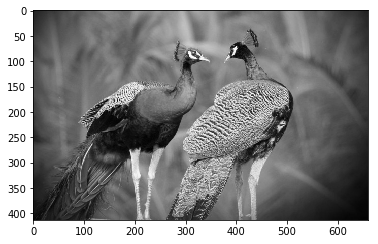

In [14]:
plt.imshow(gray,cmap ='gray')

In [16]:
413*660

272580

In [21]:
# flatten 
img1 = gray.reshape(1,413*660)

In [22]:
img1.shape

(1L, 272580L)

# HandWritten digit recognition

In [23]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)

In [27]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [30]:
X = digits.data # dataset (independent)
y = digits.target # labels

In [41]:
label = digits.target_names[0]

In [33]:
img = digits.images[0]

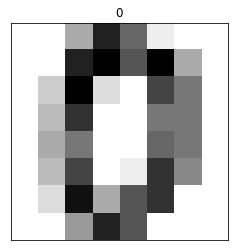

In [44]:
plt.imshow(img, cmap = 'binary')
plt.title(label)
plt.xticks([]), plt.yticks([])
plt.show()

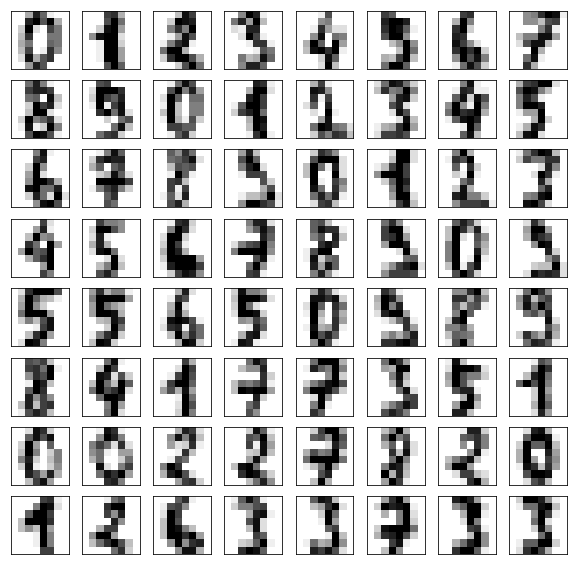

In [45]:
fig, ax = plt.subplots(8, 8, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [47]:
from sklearn.manifold import Isomap

In [48]:
iso = Isomap(n_components=2)

In [49]:
features = iso.fit_transform(X)

In [51]:
features.shape

(1797L, 2L)

In [52]:
X.shape

(1797L, 64L)

# Visualizing features

In [55]:
plt.style.use('seaborn')

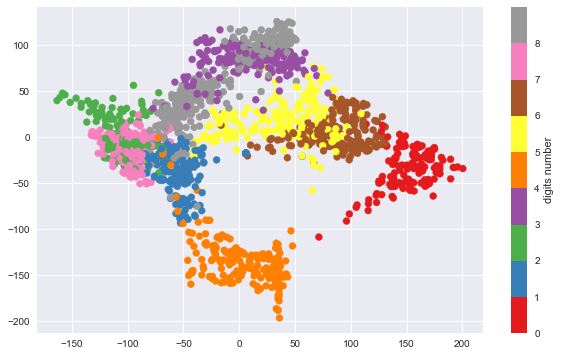

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(features[:,0], features[:,1],c = digits.target, cmap = 'Set1')
plt.colorbar(ticks = range(0,9), label = 'digits number')

## Feature Scaling

In [73]:
X_nom = X / 16.0

In [76]:
# Splitting data
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_nom ,y, test_size = 0.1,random_state=0)

In [77]:
# Buidling Model
from sklearn.neighbors import KNeighborsClassifier

In [78]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [79]:
y_pred = clf.predict(x_test)

## classification report 

In [80]:
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
cr = classification_report(y_test, y_pred,target_names=str(digits.target_names))

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 10, does not match size of target_names, 21
  .format(len(labels), len(target_names))


In [83]:
print(cr)

             precision    recall  f1-score   support

          [       1.00      1.00      1.00        11
          0       1.00      1.00      1.00        20
                  1.00      1.00      1.00        16
          1       0.91      1.00      0.95        10
                  1.00      1.00      1.00        10
          2       1.00      1.00      1.00        21
                  1.00      1.00      1.00        25
          3       1.00      1.00      1.00        20
                  1.00      0.96      0.98        23
          4       1.00      1.00      1.00        24

avg / total       0.99      0.99      0.99       180



In [84]:
cm = confusion_matrix(y_test,y_pred)

In [86]:
import seaborn as sns

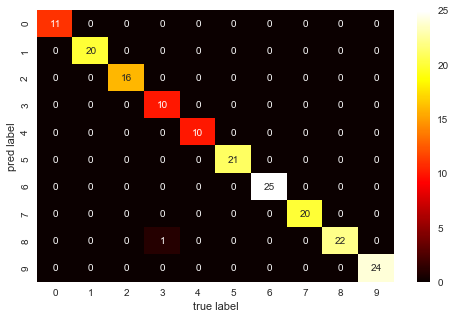

In [102]:
plt.figure(figsize=(8,5))
sns.heatmap(cm ,xticklabels=digits.target_names, yticklabels=digits.target_names,annot=True,cmap = 'hot')
plt.xlabel('true label')
plt.ylabel('pred label')
plt.show()

## Testing my image 

In [103]:
import cv2

In [112]:
img = cv2.imread("number1.jpg",0)
print(img.shape)

(300L, 300L)


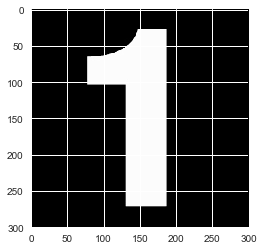

In [111]:
plt.imshow(img)

In [113]:
img_resize = cv2.resize(img,(8,8))

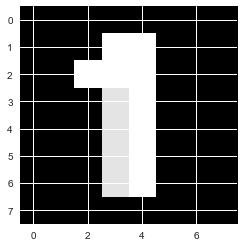

In [114]:
plt.imshow(img_resize)

In [122]:
plt.style.use('ggplot')

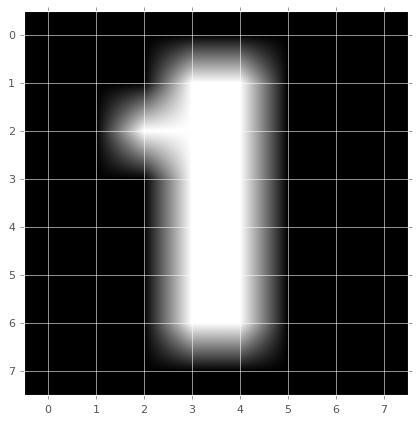

In [131]:
_,thresh = cv2.threshold(img_resize,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh,cmap = 'gray')

In [132]:
test = thresh.reshape((1,64))

In [133]:
rest = clf.predict(test)

In [134]:
rest

array([1])